In [1]:
# General Adversarial Network: - The main IDea is to make two networks compete again each other
# Where we know that they one network as generator whoch acts as a detective and the other as the 
# discriminator whoch acts as the detective.

In [2]:
# Generator never gets to see the real images.

In [3]:
# difficulties with Gan's: - 
# Training Resources, Mode Collapse and Instability.

In [5]:
# Mode Collapse: -
# Sometimes the generator may figure out an image that can fool the discriminator and 
# will only produce that, this is known as the mode Collapse.
# ways to solve it include making use of DC gan's , also we can make use of mini batch discriminator 
# that punishes the images that are too similar in a batch.

# INstability: - 
# It is diffcult to tell how much of a generated image is truly good, as it may passes through 
# the dicrimiator but may not be good enough for human eyes.

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [7]:
from tensorflow.keras.datasets import mnist

In [10]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [11]:
only_zeroes=X_train[y_train==0]# Only training the data on zeroes in the dataset.

In [12]:
only_zeroes.shape

(5923, 28, 28)

In [14]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [15]:
discrimiator=Sequential()
discrimiator.add(Flatten(input_shape=[28,28]))
discrimiator.add(Dense(150,activation='relu'))
discrimiator.add(Dense(100,activation='relu'))
# Final Output lAyer
discrimiator.add(Dense(1,activation='sigmoid'))# Is the image real or fake
discrimiator.compile(loss='binary_crossentropy',optimizer='adam') # we train the discriminator alone as well so that 
# it can detect fake images.

In [16]:
# Generator will look a lot like a decoder in autoencoders.
generator=Sequential()
generator.add(Dense(100,activation='relu',input_shape=[100]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))
# we are not compling it as it will be only trained on false data 
# Entire generator never see's the training data and can only produce images based of the Gradient descent

In [17]:
GAN = Sequential([generator,discrimiator])

In [18]:
discrimiator.trainable=False # As discrimiatro will not be trained in the second loop.

In [19]:
GAN.compile(loss='binary_crossentropy',optimizer='adam') 

In [51]:
batch_size = 32
my_data=only_zeroes
epochs=1000
codings_size=100

In [33]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000) 

In [34]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)
# It will drop the remaining data.

In [35]:
generator,discrimiator = GAN.layers

In [52]:
for epoch in range(epochs):
    print(f"Currently of epoch: - {epoch +1}")
    i=0
    for X_batch in dataset:
        i+=1
        if i%100 ==0:
            # Discriminator 
            noise = tf.random.normal(shape=[batch_size,codings_size])
            gen_images = generator(noise)
            X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
            y1 = tf.constant([[0.0]]*batch_size+[[1.0]]*batch_size) 
            # basically we are assigning all teh images as 0 for the images generated by the geenrator and 
            # 1 to all the images which are in the original Data.
            discrimiator.trainable=True
            discrimiator.train_on_batch(X_fake_vs_real,y1)
            # Train Generator 
            noise = tf.random.normal(shape=[batch_size,codings_size])
            y2=tf.constant([[1.0]]*batch_size)
            discrimiator.trainable = False
            GAN.train_on_batch(noise,y2) 

Currently of epoch: - 1
	 Currently on batch number 100 of 185
Currently of epoch: - 2
	 Currently on batch number 100 of 185
Currently of epoch: - 3
	 Currently on batch number 100 of 185
Currently of epoch: - 4
	 Currently on batch number 100 of 185
Currently of epoch: - 5
	 Currently on batch number 100 of 185
Currently of epoch: - 6
	 Currently on batch number 100 of 185
Currently of epoch: - 7
	 Currently on batch number 100 of 185
Currently of epoch: - 8
	 Currently on batch number 100 of 185
Currently of epoch: - 9
	 Currently on batch number 100 of 185
Currently of epoch: - 10
	 Currently on batch number 100 of 185
Currently of epoch: - 11
	 Currently on batch number 100 of 185
Currently of epoch: - 12
	 Currently on batch number 100 of 185
Currently of epoch: - 13
	 Currently on batch number 100 of 185
Currently of epoch: - 14
	 Currently on batch number 100 of 185
Currently of epoch: - 15
	 Currently on batch number 100 of 185
Currently of epoch: - 16
	 Currently on batch num

Currently of epoch: - 129
	 Currently on batch number 100 of 185
Currently of epoch: - 130
	 Currently on batch number 100 of 185
Currently of epoch: - 131
	 Currently on batch number 100 of 185
Currently of epoch: - 132
	 Currently on batch number 100 of 185
Currently of epoch: - 133
	 Currently on batch number 100 of 185
Currently of epoch: - 134
	 Currently on batch number 100 of 185
Currently of epoch: - 135
	 Currently on batch number 100 of 185
Currently of epoch: - 136
	 Currently on batch number 100 of 185
Currently of epoch: - 137
	 Currently on batch number 100 of 185
Currently of epoch: - 138
	 Currently on batch number 100 of 185
Currently of epoch: - 139
	 Currently on batch number 100 of 185
Currently of epoch: - 140
	 Currently on batch number 100 of 185
Currently of epoch: - 141
	 Currently on batch number 100 of 185
Currently of epoch: - 142
	 Currently on batch number 100 of 185
Currently of epoch: - 143
	 Currently on batch number 100 of 185
Currently of epoch: - 144

	 Currently on batch number 100 of 185
Currently of epoch: - 262
	 Currently on batch number 100 of 185
Currently of epoch: - 263
	 Currently on batch number 100 of 185
Currently of epoch: - 264
	 Currently on batch number 100 of 185
Currently of epoch: - 265
	 Currently on batch number 100 of 185
Currently of epoch: - 266
	 Currently on batch number 100 of 185
Currently of epoch: - 267
	 Currently on batch number 100 of 185
Currently of epoch: - 268
	 Currently on batch number 100 of 185
Currently of epoch: - 269
	 Currently on batch number 100 of 185
Currently of epoch: - 270
	 Currently on batch number 100 of 185
Currently of epoch: - 271
	 Currently on batch number 100 of 185
Currently of epoch: - 272
	 Currently on batch number 100 of 185
Currently of epoch: - 273
	 Currently on batch number 100 of 185
Currently of epoch: - 274
	 Currently on batch number 100 of 185
Currently of epoch: - 275
	 Currently on batch number 100 of 185
Currently of epoch: - 276
	 Currently on batch numb

Currently of epoch: - 388
	 Currently on batch number 100 of 185
Currently of epoch: - 389
	 Currently on batch number 100 of 185
Currently of epoch: - 390
	 Currently on batch number 100 of 185
Currently of epoch: - 391
	 Currently on batch number 100 of 185
Currently of epoch: - 392
	 Currently on batch number 100 of 185
Currently of epoch: - 393
	 Currently on batch number 100 of 185
Currently of epoch: - 394
	 Currently on batch number 100 of 185
Currently of epoch: - 395
	 Currently on batch number 100 of 185
Currently of epoch: - 396
	 Currently on batch number 100 of 185
Currently of epoch: - 397
	 Currently on batch number 100 of 185
Currently of epoch: - 398
	 Currently on batch number 100 of 185
Currently of epoch: - 399
	 Currently on batch number 100 of 185
Currently of epoch: - 400
	 Currently on batch number 100 of 185
Currently of epoch: - 401
	 Currently on batch number 100 of 185
Currently of epoch: - 402
	 Currently on batch number 100 of 185
Currently of epoch: - 403

Currently of epoch: - 520
	 Currently on batch number 100 of 185
Currently of epoch: - 521
	 Currently on batch number 100 of 185
Currently of epoch: - 522
	 Currently on batch number 100 of 185
Currently of epoch: - 523
	 Currently on batch number 100 of 185
Currently of epoch: - 524
	 Currently on batch number 100 of 185
Currently of epoch: - 525
	 Currently on batch number 100 of 185
Currently of epoch: - 526
	 Currently on batch number 100 of 185
Currently of epoch: - 527
	 Currently on batch number 100 of 185
Currently of epoch: - 528
	 Currently on batch number 100 of 185
Currently of epoch: - 529
	 Currently on batch number 100 of 185
Currently of epoch: - 530
	 Currently on batch number 100 of 185
Currently of epoch: - 531
	 Currently on batch number 100 of 185
Currently of epoch: - 532
	 Currently on batch number 100 of 185
Currently of epoch: - 533
	 Currently on batch number 100 of 185
Currently of epoch: - 534
	 Currently on batch number 100 of 185
Currently of epoch: - 535

Currently of epoch: - 652
	 Currently on batch number 100 of 185
Currently of epoch: - 653
	 Currently on batch number 100 of 185
Currently of epoch: - 654
	 Currently on batch number 100 of 185
Currently of epoch: - 655
	 Currently on batch number 100 of 185
Currently of epoch: - 656
	 Currently on batch number 100 of 185
Currently of epoch: - 657
	 Currently on batch number 100 of 185
Currently of epoch: - 658
	 Currently on batch number 100 of 185
Currently of epoch: - 659
	 Currently on batch number 100 of 185
Currently of epoch: - 660
	 Currently on batch number 100 of 185
Currently of epoch: - 661
	 Currently on batch number 100 of 185
Currently of epoch: - 662
	 Currently on batch number 100 of 185
Currently of epoch: - 663
	 Currently on batch number 100 of 185
Currently of epoch: - 664
	 Currently on batch number 100 of 185
Currently of epoch: - 665
	 Currently on batch number 100 of 185
Currently of epoch: - 666
	 Currently on batch number 100 of 185
Currently of epoch: - 667

Currently of epoch: - 779
	 Currently on batch number 100 of 185
Currently of epoch: - 780
	 Currently on batch number 100 of 185
Currently of epoch: - 781
	 Currently on batch number 100 of 185
Currently of epoch: - 782
	 Currently on batch number 100 of 185
Currently of epoch: - 783
	 Currently on batch number 100 of 185
Currently of epoch: - 784
	 Currently on batch number 100 of 185
Currently of epoch: - 785
	 Currently on batch number 100 of 185
Currently of epoch: - 786
	 Currently on batch number 100 of 185
Currently of epoch: - 787
	 Currently on batch number 100 of 185
Currently of epoch: - 788
	 Currently on batch number 100 of 185
Currently of epoch: - 789
	 Currently on batch number 100 of 185
Currently of epoch: - 790
	 Currently on batch number 100 of 185
Currently of epoch: - 791
	 Currently on batch number 100 of 185
Currently of epoch: - 792
	 Currently on batch number 100 of 185
Currently of epoch: - 793
	 Currently on batch number 100 of 185
Currently of epoch: - 794

Currently of epoch: - 911
	 Currently on batch number 100 of 185
Currently of epoch: - 912
	 Currently on batch number 100 of 185
Currently of epoch: - 913
	 Currently on batch number 100 of 185
Currently of epoch: - 914
	 Currently on batch number 100 of 185
Currently of epoch: - 915
	 Currently on batch number 100 of 185
Currently of epoch: - 916
	 Currently on batch number 100 of 185
Currently of epoch: - 917
	 Currently on batch number 100 of 185
Currently of epoch: - 918
	 Currently on batch number 100 of 185
Currently of epoch: - 919
	 Currently on batch number 100 of 185
Currently of epoch: - 920
	 Currently on batch number 100 of 185
Currently of epoch: - 921
	 Currently on batch number 100 of 185
Currently of epoch: - 922
	 Currently on batch number 100 of 185
Currently of epoch: - 923
	 Currently on batch number 100 of 185
Currently of epoch: - 924
	 Currently on batch number 100 of 185
Currently of epoch: - 925
	 Currently on batch number 100 of 185
Currently of epoch: - 926

In [63]:
noise = tf.random.normal(shape=[1,codings_size])

In [70]:
images=generator.predict(noise)

1/1 [==============================] - 0s 89ms/step


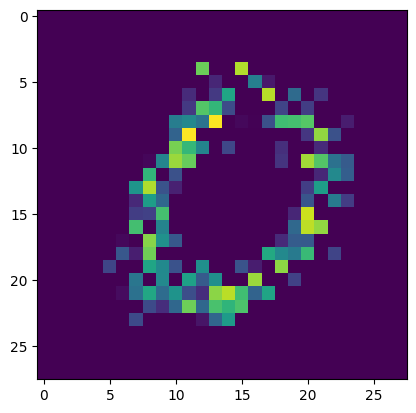

In [71]:
plt.imshow(images[0])
# we can see that we are able to get something simislar to that of a zero in this case 